# Testing Kneed


In [2]:
import pandas as pd

In [3]:
url = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv"
print(url)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/Mall_Customers.csv


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv(url)
df.head()

,CustomerID,Gender,Age,Income,Spending
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = df[["Income", "Spending"]]
X.head()

,Income,Spending
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [8]:
num_pipe = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())

In [9]:
X_pre = num_pipe.fit_transform(X)
X_pre[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

## KMeans inertia


In [10]:
from sklearn.cluster import KMeans

In [11]:
inertias = []
K = range(1, 15)

for i in K:
    km = KMeans(n_clusters=i, random_state=42).fit(X_pre)
    inertias.append(km.inertia_)

inertias

[400.0,
 273.66888662642015,
 157.70400815035947,
 109.22822707921345,
 65.5684081557168,
 60.13287487193422,
 49.668244837367986,
 37.319122878338824,
 32.49508119910091,
 30.05932269404221,
 26.76120176636121,
 26.232893769786838,
 23.193553421978397,
 21.195257238649532]

In [12]:
from kneed import KneeLocator

kneedle = KneeLocator(K, inertias, curve="convex", direction="decreasing")

elbow_k = kneedle.elbow

elbow_k

np.int64(5)

In [23]:
best_inertia = inertias[elbow_k - 1]
best_inertia

65.5684081557168

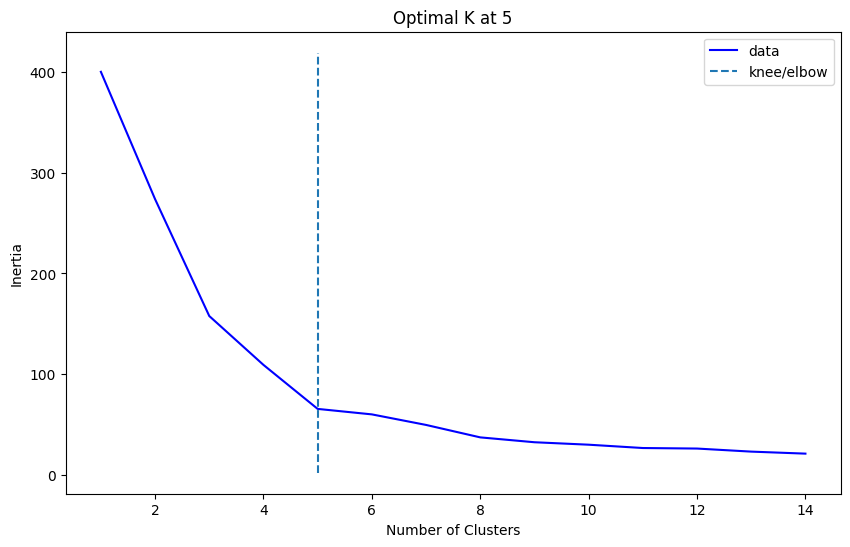

In [14]:
kneedle.plot_knee(
    figsize=(10, 6),
    xlabel="Number of Clusters",
    ylabel="Inertia",
    title=f"Optimal K at {elbow_k}",
)

In [15]:
labels = KMeans(n_clusters=elbow_k, random_state=42).fit_predict(X_pre)
labels

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [16]:
X1 = X.copy()

In [17]:
X1["Cluster"] = labels
X1.head()

,Income,Spending,Cluster
0,15,39,4
1,15,81,2
2,16,6,4
3,16,77,2
4,17,40,4


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
centroids = X1.groupby("Cluster").mean()
centroids

,Income,Spending
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


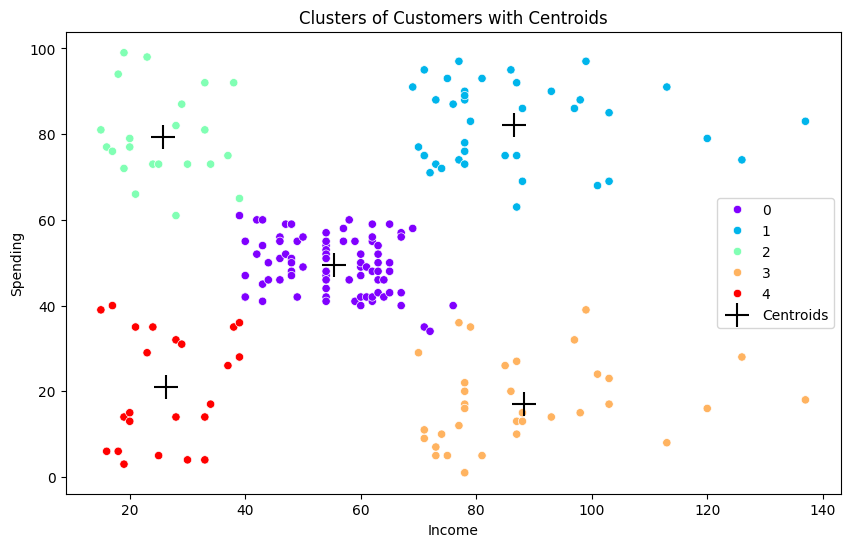

In [20]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=X1, x="Income", y="Spending", hue="Cluster", palette="rainbow", legend="full"
)
plt.scatter(
    centroids["Income"],
    centroids["Spending"],
    s=300,
    c="black",
    marker="+",
    label="Centroids",
)
plt.title("Clusters of Customers with Centroids")
plt.legend()
plt.show()

In [21]:
for i in range(elbow_k):
    print(f"Cluster {i}:")
    print(X1[X1["Cluster"] == i].describe())
    print("\n")

Cluster 0:
          Income   Spending  Cluster
count  81.000000  81.000000     81.0
mean   55.296296  49.518519      0.0
std     8.988109   6.530909      0.0
min    39.000000  34.000000      0.0
25%    48.000000  44.000000      0.0
50%    54.000000  50.000000      0.0
75%    62.000000  55.000000      0.0
max    76.000000  61.000000      0.0


Cluster 1:
           Income   Spending  Cluster
count   39.000000  39.000000     39.0
mean    86.538462  82.128205      1.0
std     16.312485   9.364489      0.0
min     69.000000  63.000000      1.0
25%     75.500000  74.500000      1.0
50%     79.000000  83.000000      1.0
75%     95.000000  90.000000      1.0
max    137.000000  97.000000      1.0


Cluster 2:
          Income   Spending  Cluster
count  22.000000  22.000000     22.0
mean   25.727273  79.363636      2.0
std     7.566731  10.504174      0.0
min    15.000000  61.000000      2.0
25%    19.250000  73.000000      2.0
50%    24.500000  77.000000      2.0
75%    32.250000  85.750000  

In [24]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(X_pre, labels)
sample_silhouette_values = silhouette_samples(X_pre, labels)

In [25]:
silhouette_avg

np.float64(0.5546571631111091)

In [27]:
sample_silhouette_values

array([ 0.41124046,  0.69620683,  0.63934069,  0.69604195,  0.38563359,
        0.69748215,  0.64833998,  0.65893138,  0.62927054,  0.66184814,
        0.67709497,  0.62250892,  0.67914947,  0.7183836 ,  0.67989007,
        0.72517377,  0.480728  ,  0.54086604,  0.57771355,  0.63069704,
        0.46089203,  0.67601561,  0.64089467,  0.67033897,  0.66074953,
        0.70471845,  0.48567333,  0.29331369,  0.4925691 ,  0.6846275 ,
        0.60601978,  0.61174317,  0.57727428,  0.61836077,  0.6096252 ,
        0.64028425,  0.58637068,  0.52937454,  0.42191998,  0.48596674,
        0.09076309,  0.54813337, -0.01212476,  0.12114123,  0.3126116 ,
        0.04964594,  0.39355123,  0.43860327,  0.29680812,  0.29680812,
        0.52456542,  0.3036705 ,  0.51899981,  0.34289529,  0.49331338,
        0.37566018,  0.60191899,  0.54434561,  0.64121219,  0.59585853,
        0.55956233,  0.58127935,  0.65113096,  0.50415135,  0.6798204 ,
        0.52847598,  0.6854379 ,  0.66721797,  0.52847598,  0.65

In [30]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
from sklearn.metrics import silhouette_samples, silhouette_score


def plot_silhouette(X, labels):
    n_clusters = len(np.unique(labels))
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels)

    fig, ax1 = plt.subplots()
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_yticks([])
    plt.show()

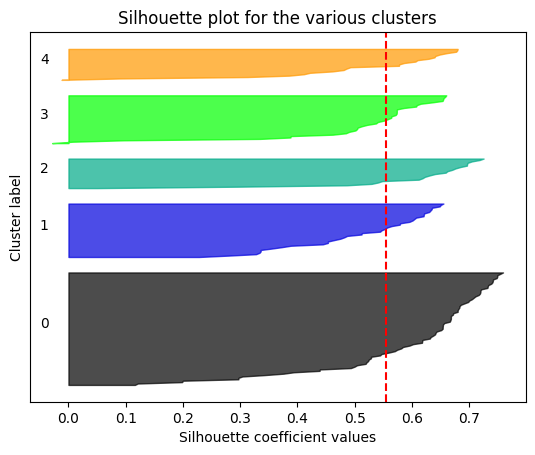

In [31]:
plot_silhouette(X_pre, labels)

In [32]:
from sklearn.metrics import silhouette_score

In [41]:
sils = []
K = range(2, 15)
for i in K:
    preds = KMeans(n_clusters=i, random_state=42).fit_predict(X_pre)
    silhouette_avg = silhouette_score(X_pre, preds)
    sils.append(silhouette_avg.round(4))

In [42]:
sils

[np.float64(0.3973),
 np.float64(0.4666),
 np.float64(0.4943),
 np.float64(0.5547),
 np.float64(0.5138),
 np.float64(0.502),
 np.float64(0.455),
 np.float64(0.4567),
 np.float64(0.4448),
 np.float64(0.4456),
 np.float64(0.3714),
 np.float64(0.3826),
 np.float64(0.3875)]

In [44]:
np.max(sils)

np.float64(0.5547)

In [46]:
best_k = K[np.argmax(sils)]
best_k

5

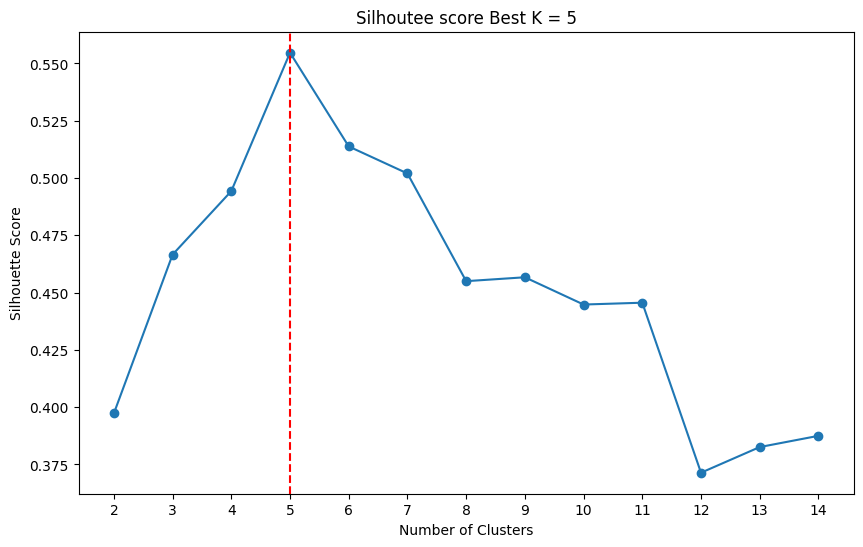

In [51]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(K, sils, marker="o")
plt.title(f"Silhoutee score Best K = {best_k}")
plt.axvline(x=best_k, color="red", linestyle="--")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.xticks(K)
plt.show()